In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/df_nan.csv')

In [3]:
df.head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                      0.0   
1                     0.0             2.0                     64.0   
2                    -1.0             1.0                     -1.0   
3                     0.0             2.0                      NaN   
4                     0.0            10.0                    627.5   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2               1.0   
1         0.00       0.10         0.0         0.0      2               2.0   
2         0.20       0.20         0.0         0.0      2               4.0   
3         0.05       0.14         0.0         0.0      2               3.0   
4         0.02       0.05         0.0         0.0      2               3.0   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor        0        0  
1        2       1            2  Returning_Visitor        0        0  
2        1       9            3  Returning_Visitor        0        0  
3        2       2            4  Returning_Visitor        0        0  
4        3       1            4  Returning_Visitor        1        0

In [5]:
df.isnull().sum()

Administrative                0
Administrative_Duration    1448
Informational                 0
Informational_Duration      231
ProductRelated                0
ProductRelated_Duration    6148
BounceRates                   0
ExitRates                     0
PageValues                 2473
SpecialDay                    0
Month                         0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
VisitorType                   0
Weekend                       0
Revenue                       0
dtype: int64

# One hot encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
one_hot = OneHotEncoder()
X_oh = one_hot.fit_transform(df[['VisitorType']])

In [9]:
df.drop('VisitorType', axis=1, inplace=True)

In [10]:
df = pd.concat([df,pd.DataFrame(data=X_oh.todense(), columns=one_hot.categories_)], axis=1)

In [11]:
df.head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                      0.0   
1                     0.0             2.0                     64.0   
2                    -1.0             1.0                     -1.0   
3                     0.0             2.0                      NaN   
4                     0.0            10.0                    627.5   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2               1.0   
1         0.00       0.10         0.0         0.0      2               2.0   
2         0.20       0.20         0.0         0.0      2               4.0   
3         0.05       0.14         0.0         0.0      2               3.0   
4         0.02       0.05         0.0         0.0      2               3.0   

   Browser  Region  TrafficType  Weekend  Revenue  (New_Visitor,)  (Other,)  \
0        1       1            1        0        0             0.0       0.0   
1        2       1            2        0        0             0.0       0.0   
2        1       9            3        0        0             0.0       0.0   
3        2       2            4        0        0             0.0       0.0   
4        3       1            4        1        0             0.0       0.0   

   (Returning_Visitor,)  
0                   1.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0

# Fill with mean the duration columns

In [13]:
from sklearn.impute import SimpleImputer

In [15]:
X = df.drop('PageValues', axis=1) #trying to fill everything except pages values

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imputer.fit_transform(X)

In [17]:
X_imp

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [24.        , 59.26984617,  6.        , ...,  0.        ,
         0.        ,  1.        ],
       [26.        , 59.26984617,  9.        , ...,  0.        ,
         0.        ,  1.        ],
       [27.        , 59.26984617,  2.        , ...,  0.        ,
         0.        ,  1.        ]])

In [18]:
df_mean = pd.DataFrame(X_imp, columns = X.columns)

In [21]:
df_mean['PageValues'] = df['PageValues']

In [22]:
df_mean.isnull().sum()

Administrative                0
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated                0
ProductRelated_Duration       0
BounceRates                   0
ExitRates                     0
SpecialDay                    0
Month                         0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
Weekend                       0
Revenue                       0
(New_Visitor,)                0
(Other,)                      0
(Returning_Visitor,)          0
PageValues                 2473
dtype: int64

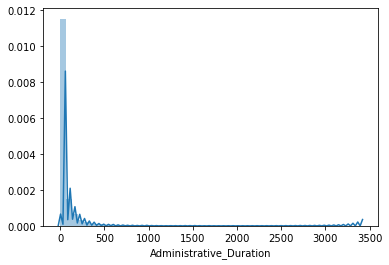

In [24]:
sns.distplot(df_mean['Administrative_Duration'])

/Users/lola/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


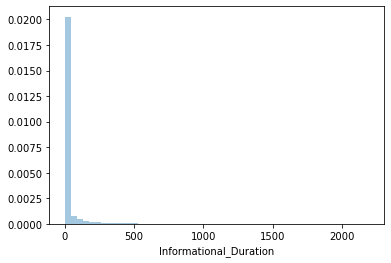

In [27]:
sns.distplot(df_mean['Informational_Duration'])

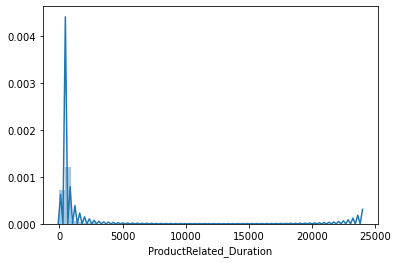

In [28]:
sns.distplot(df_mean['ProductRelated_Duration'])

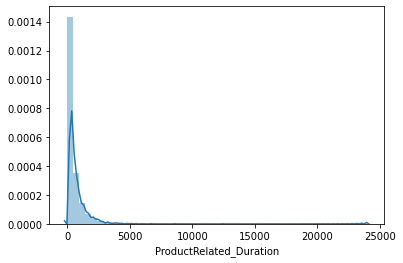

In [29]:
sns.distplot(df['ProductRelated_Duration'])

# Fill NaN in page values with KNN

In [30]:
from sklearn.impute import KNNImputer

In [36]:
X = df_mean

In [34]:
X

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
12299         NaN
12300         NaN
12301    0.870148
12302         NaN
12303         NaN
Name: PageValues, Length: 12304, dtype: float64

In [37]:
imputer = KNNImputer(missing_values=np.nan, n_neighbors=2)
X_imp = imputer.fit_transform(X)

In [38]:
X_imp

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , -1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [24.        , 59.26984617,  6.        , ...,  0.        ,
         1.        ,  0.87014848],
       [26.        , 59.26984617,  9.        , ...,  0.        ,
         1.        ,  0.43507424],
       [27.        , 59.26984617,  2.        , ...,  0.        ,
         1.        ,  0.07532525]])

In [39]:
df_knn = pd.DataFrame(X_imp, columns = X.columns)

In [40]:
df_knn.head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0               479.647091   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  SpecialDay  Month  OperatingSystems  Browser  \
0         0.20       0.20         0.0    2.0               1.0      1.0   
1         0.00       0.10         0.0    2.0               2.0      2.0   
2         0.20       0.20         0.0    2.0               4.0      1.0   
3         0.05       0.14         0.0    2.0               3.0      2.0   
4         0.02       0.05         0.0    2.0               3.0      3.0   

   Region  TrafficType  Weekend  Revenue  (New_Visitor,)  (Other,)  \
0     1.0          1.0      0.0      0.0             0.0       0.0   
1     1.0          2.0      0.0      0.0             0.0       0.0   
2     9.0          3.0      0.0      0.0             0.0       0.0   
3     2.0          4.0      0.0      0.0             0.0       0.0   
4     1.0          4.0      1.0      0.0             0.0       0.0   

   (Returning_Visitor,)  PageValues  
0                   1.0         0.0  
1                   1.0         0.0  
2                   1.0         0.0  
3                   1.0         0.0  
4                   1.0         0.0

/Users/lola/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


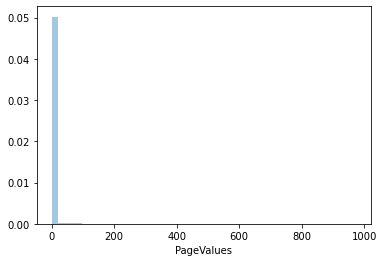

In [41]:
sns.distplot(df_knn['PageValues'])

In [43]:
df_knn['PageValues'].value_counts()

0.000000      11786
64.457500        12
0.423669          8
33.742500         7
10.452500         6
              ...  
81.816000         1
54.945000         1
854.525000        1
27.742500         1
10.659000         1
Name: PageValues, Length: 371, dtype: int64

# Export data to csv

In [45]:
df_knn.to_csv('data/df_mean_knn.csv', index=False)